<a href="https://colab.research.google.com/github/jrossonrinehart/AI_Assignment7/blob/main/metaltest1%20(Graphs%20for%20both%20files%20are%20in%20here).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

metrics from metaltest2

GPU - Training Time = 98.96444249153137s Accuracy 87.3%

CPU - Training Time = 224.139s Accuracy 88.0%

In [2]:
import matplotlib.pyplot as plt

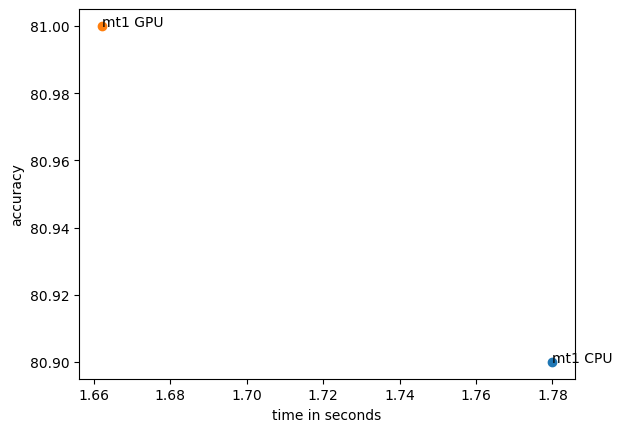

In [10]:
#metaltest1 CPU
plt.scatter(1.780, 80.9)
#metaltest1 GPU
plt.scatter( 1.662,81)

plt.text(1.780, 80.9, "mt1 CPU")
plt.text(1.662, 81, "mt1 GPU")
plt.xlabel("time in seconds")
plt.ylabel("accuracy")
plt.show()

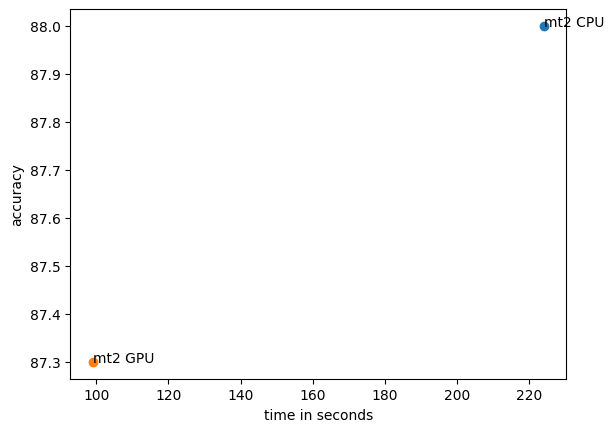

In [11]:
#metaltest2 CPU
plt.scatter(224.139, 88)
#metaltest2 GPU
plt.scatter(98.964,87.3)

plt.text(224.139, 88, "mt2 CPU")
plt.text(98.964,87.3, "mt2 GPU")
plt.xlabel("time in seconds")
plt.ylabel("accuracy")
plt.show()

#CPU Run

In [ ]:
import torch
import time
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Define linear model we will use below
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

def train(dataloader, model, loss_fn, optimizer, device):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# modified from https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
# get our competing devices ready ... go ahead and init all three here, but ONLY USE ONE during each test
# scroll down below and replace the references to gpu_, tpu_, cpu with whichever device you are testing
# make sure you replace ALL of them
gpu_device = torch.device("cuda")
tpu_device = torch.device("xla")
cpu_device = torch.device("cpu")

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

# first hyperparam
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Show some sample data
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break


# sample code for working with m1
  # Create a Tensor directly on the mps device
  #x = torch.ones(5, device=mps_device)
  # Or
  #x = torch.ones(5, device="mps")
  # Any operation happens on the GPU
  #y = x * 2

  # Move your model to mps just like any other device
model = NeuralNetwork().to(device=cpu_device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
print("starting timer for training using CPU...")
start = time.time()
epochs = 30 
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer, device=cpu_device)
print(f"completed training in ... {time.time()-start}s")

print("starting timer for testing using CPU...")
start = time.time()
test(test_dataloader, model, loss_fn, device=cpu_device)
print(f"completed testing in ... {time.time()-start}s")

100%|██████████| 26421880/26421880 [00:01<00:00, 18195857.49it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 348809.36it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6158902.67it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 2168988.15it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
starting timer for training using CPU...
Epoch 1
-------------------------------
loss: 2.297027  [   64/60000]
loss: 2.289112  [ 6464/60000]
loss: 2.272602  [12864/60000]
loss: 2.266188  [19264/60000]
loss: 2.243844  [25664/60000]
loss: 2.229522  [32064/60000]
loss: 2.235333  [38464/60000]
loss: 2.210760  [44864/60000]
loss: 2.202165  [51264/60000]
loss: 2.169469  [57664/60000]
Epoch 2
-------------------------------
loss: 2.175094  [   64/60000]
loss: 2.167756  [ 6464/60000]
loss: 2.116666  [12864/60000]
loss: 2.125790  [19264/60000]
loss: 2.078140  [25664/60000]
loss: 2.027013  [32064/60000]
loss: 2.050354  [38464/60000]
loss: 1.982969  [44864/60000]
loss: 1.984258  [51264/60000]
loss: 1.908330  [57664/60000]
Epoch 3
-------------------------------
loss: 1.937564  [   64/60000]
loss: 1.913983  [ 6464/60000]


#GPU Run

In [ ]:
import torch
import time
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Define linear model we will use below
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

def train(dataloader, model, loss_fn, optimizer, device):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# modified from https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
# get our competing devices ready ... go ahead and init all three here, but ONLY USE ONE during each test
# scroll down below and replace the references to gpu_, tpu_, cpu with whichever device you are testing
# make sure you replace ALL of them
gpu_device = torch.device("cuda")
tpu_device = torch.device("xla")
cpu_device = torch.device("cpu")

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

# first hyperparam
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Show some sample data
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break


# sample code for working with m1
  # Create a Tensor directly on the mps device
  #x = torch.ones(5, device=mps_device)
  # Or
  #x = torch.ones(5, device="mps")
  # Any operation happens on the GPU
  #y = x * 2

  # Move your model to mps just like any other device
model = NeuralNetwork().to(device=gpu_device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
print("starting timer for training using CPU...")
start = time.time()
epochs = 30 
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer, device=gpu_device)
print(f"completed training in ... {time.time()-start}s")

print("starting timer for testing using CPU...")
start = time.time()
test(test_dataloader, model, loss_fn, device=gpu_device)
print(f"completed testing in ... {time.time()-start}s")

100%|██████████| 26421880/26421880 [00:00<00:00, 110250300.42it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 4889020.28it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 58355089.83it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16259244.72it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
starting timer for training using CPU...
Epoch 1
-------------------------------
loss: 2.308863  [   64/60000]
loss: 2.298727  [ 6464/60000]
loss: 2.276380  [12864/60000]
loss: 2.267447  [19264/60000]
loss: 2.264991  [25664/60000]
loss: 2.223901  [32064/60000]
loss: 2.233513  [38464/60000]
loss: 2.204177  [44864/60000]
loss: 2.197183  [51264/60000]
loss: 2.162914  [57664/60000]
Epoch 2
-------------------------------
loss: 2.167871  [   64/60000]
loss: 2.157590  [ 6464/60000]
loss: 2.098866  [12864/60000]
loss: 2.116066  [19264/60000]
loss: 2.077002  [25664/60000]
loss: 2.011971  [32064/60000]
loss: 2.039972  [38464/60000]
loss: 1.965366  [44864/60000]
loss: 1.962523  [51264/60000]
loss: 1.895414  [57664/60000]
Epoch 3
-------------------------------
loss: 1.917456  [   64/60000]
loss: 1.886044  [ 6464/60000]
loss: 1.768894  [12864/60000]
loss: 1.814316  [19264/60000]
loss: 1.717117  [25664/60

#TPU Run

In [ ]:
import torch
import time
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Define linear model we will use below
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

def train(dataloader, model, loss_fn, optimizer, device):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# modified from https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
# get our competing devices ready ... go ahead and init all three here, but ONLY USE ONE during each test
# scroll down below and replace the references to gpu_, tpu_, cpu with whichever device you are testing
# make sure you replace ALL of them
gpu_device = torch.device("cuda")
tpu_device = torch.device("xla")
cpu_device = torch.device("cpu")

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

# first hyperparam
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Show some sample data
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break


# sample code for working with m1
  # Create a Tensor directly on the mps device
  #x = torch.ones(5, device=mps_device)
  # Or
  #x = torch.ones(5, device="mps")
  # Any operation happens on the GPU
  #y = x * 2

  # Move your model to mps just like any other device
model = NeuralNetwork().to(device=tpu_device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
print("starting timer for training using CPU...")
start = time.time()
epochs = 30 
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer, device=tpu_device)
print(f"completed training in ... {time.time()-start}s")

print("starting timer for testing using CPU...")
start = time.time()
test(test_dataloader, model, loss_fn, device=tpu_device)
print(f"completed testing in ... {time.time()-start}s")